# **Project Name**    - **CARDIOVASCULAR RISK PREDICTION**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**   Soumya Ranjan Rath
##### **Team Member 2 -**   Abhisekh Patro


# **Project Summary -**

The goal of this project was to develop a model for predicting cardiovascular risk after ten years using machine learning techniques. The dataset used for this project consisted of demographic information, medical history, and laboratory test results for a sample of individuals. The model was trained using a supervised learning approach and evaluated using a variety of metrics such as accuracy, precision, recall, roc auc score.

The results of the project showed that the Random Forest Classifier model was able to accurately predict cardiovascular risk with an overall accuracy of 84%. The model performed particularly well in identifying high-risk individuals, with a recall of 89% for the high-risk class. These results suggest that the model could be used to identify individuals at high risk of cardiovascular disease, allowing for early intervention and prevention.

Overall, this project demonstrated the potential of machine learning techniques for predicting cardiovascular risk and highlights the importance of using a combination of demographic information, medical history, and laboratory test results to improve the accuracy of risk predictions.

In this project, We will do
Define Problem Statement
Importing the Libraries and the Dataset
Understanding Data
Exploratory Data Analysis
Data Cleaning
Hypothesis Testing (if required)
Feature Engineering
ML Model Implementation
Conclusion


# **GitHub Link -**

GitHub Link-https://github.com/Soumyaranjanrath785/Cardiovascular-Risk-Prediction

# **Problem Statement**


<h1><b><u>About Project:</u></b></h1>


> The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 3390 records and 17 attributes.

<h3><b>Variables:</b></h3>

* Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

<h1><b><u>Objective:</u></b></h1>

> Predict the overall risk of heart disease using Classification regression



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from scipy import stats


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve




### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/csv files/data_cardiovascular_risk.csv'

In [4]:
# using pandas library and 'read_csv' function to read csv file
dataset = pd.read_csv(path)

# Make a copy of data
df = dataset.copy()

### Dataset First View

In [5]:
# Dataset First Look
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape

(3390, 17)

* This Dataset has 3390 observations in it with 17 columns(features)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
# percentage of missing data per category
total = dataset.isnull().sum().sort_values(ascending=False)
percent_total = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missingdf = missing[missing['Total']>0]
print(missingdf)

            Total  Percentage
glucose       304    8.967552
education      87    2.566372
BPMeds         44    1.297935
totChol        38    1.120944
cigsPerDay     22    0.648968
BMI            14    0.412979
heartRate       1    0.029499


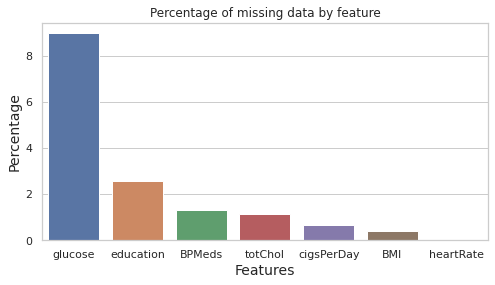

In [11]:
# Visualizing the missing values
plt.figure(figsize=(8,4))
sns.set(style="whitegrid")
sns.barplot(x=missingdf.index, y=missingdf['Percentage'], data = missingdf)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Dataset Describe
dataset.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

1. **Sex:** male or female("M" or "F")
2. **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

##### **Behavioral**
3. **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
4. **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

##### **Medical( history)**
5. **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
6. **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
7. **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
8. **Diabetes:** whether or not the patient had diabetes (Nominal)

##### **Medical(current)**
9. **Tot Chol:** total cholesterol level (Continuous)
10. **Sys BP:** systolic blood pressure (Continuous)
11. **Dia BP:** diastolic blood pressure (Continuous)
12. **BMI:** Body Mass Index (Continuous)
13. **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
14. **Glucose:** glucose level (Continuous)

##### **Predict variable (desired target)**
15. **TenYearCHD:** 10-year risk of coronary heart disease CHD(binary: 1 means “Yes”, 0 means “No”) -
DV



### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
dataset.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Removing columns such as 'id' & 'education' 
dataset.drop(['id','education'],axis=1,inplace=True)

In [16]:
# Lets check the discrete and continuous features
categorical_features = [i for i in dataset.columns if dataset[i].nunique()<=4]
numeric_features = [i for i in dataset.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

####**Distribution of the dependent variable:**

In [17]:
# Value counts for Dependent variable
dep_variable = 'TenYearCHD'
dataset[dep_variable].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

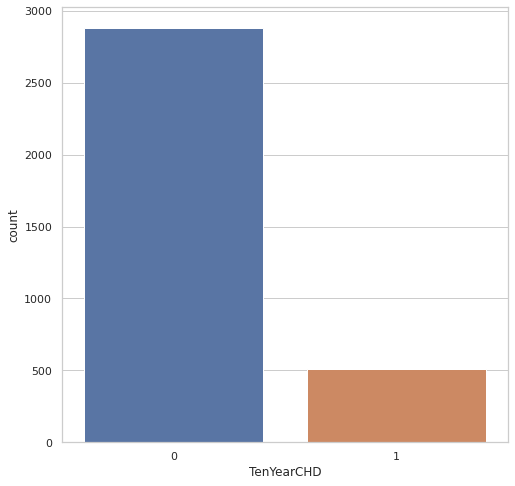

In [18]:
# Plotting the countplot for dependent variable
dep_variable = 'TenYearCHD'
plt.figure(figsize = (8,8))
sns.countplot(df[dep_variable])
plt.show()

**Out of 3,390 records** 

  **-> 2,879 are 0 (84.92%)**

  **-> 511 are 1  (15.07%)**

**The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.**

####**Analyzing the distribution of the continuous independent variables:**

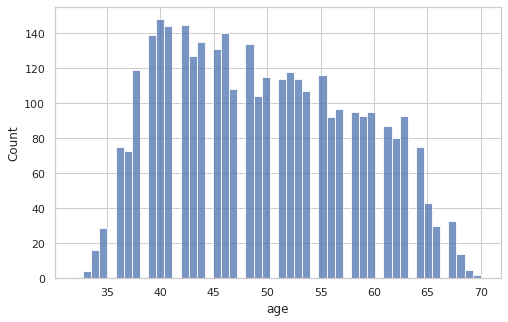

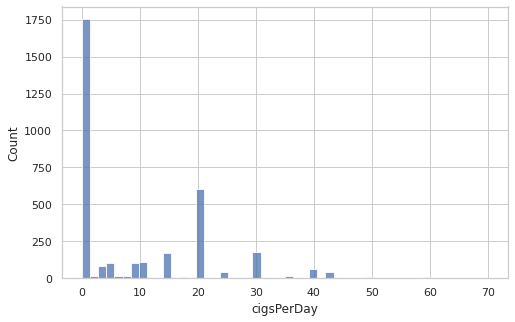

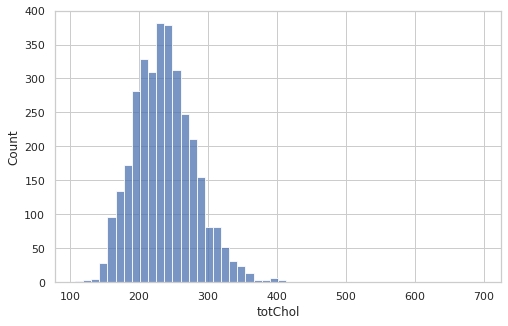

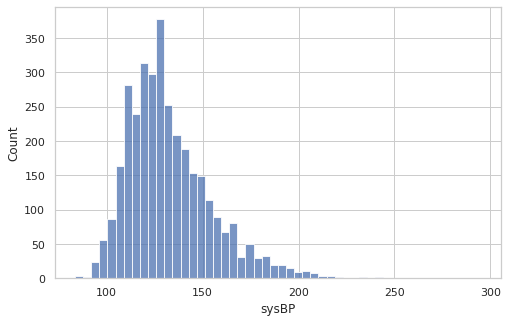

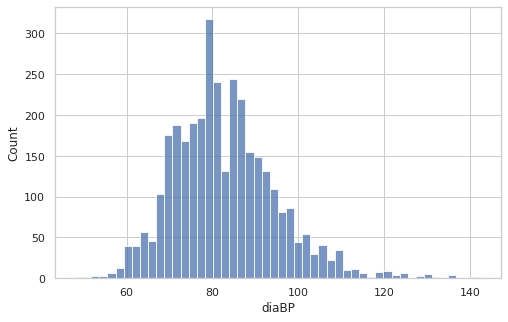

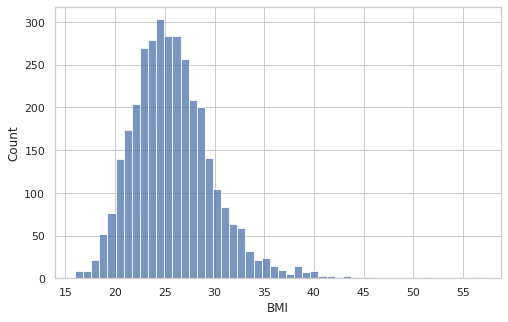

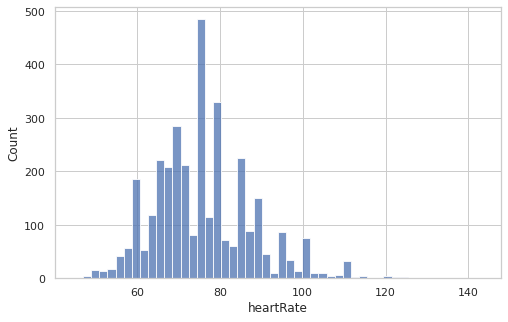

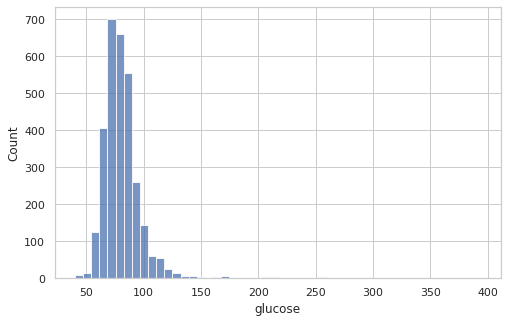

In [19]:
# Plotting distribution of values of numerical features
for col in numeric_features:
  plt.figure(figsize = (8,5))
  sns.histplot(df[col], bins = 50)

**Most of the numerical features are skewed and contains outliers.**

####**Analyzing the distribution of the discrete independent variables:**

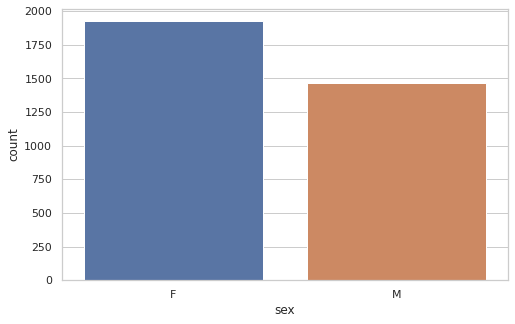

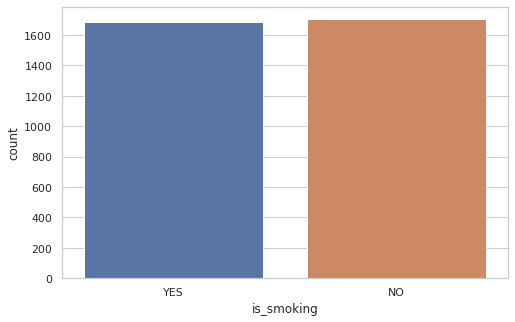

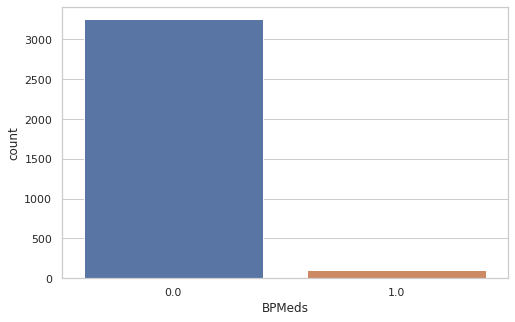

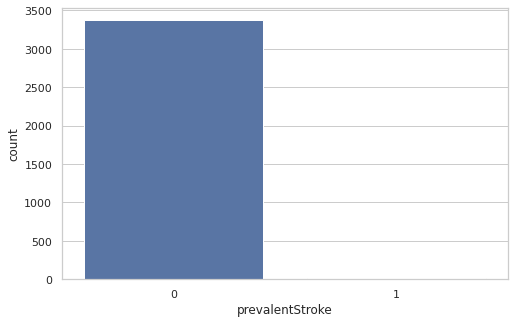

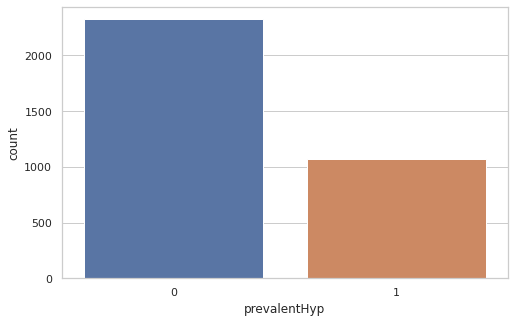

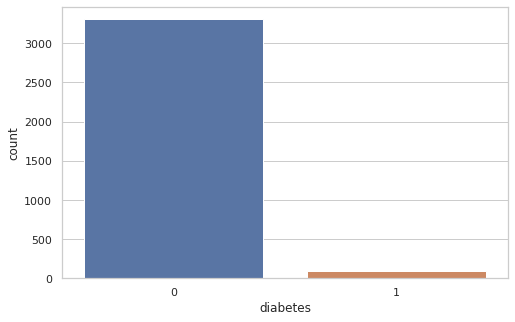

In [20]:
# plotting the count plot of categorical features
cat_features=['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for col in cat_features:
  plt.figure(figsize = (8,5))
  sns.countplot(dataset[col])
  plt.show()

**Summary:**
* **There are more female patients compared to male patients.**
* **Almost half the patients are smokers.**
* **100 patients under the study are undertaking blood pressure medication.**
* **22 patients under the study have experienced a stroke.**
* **1069 patients have hypertension.**
* **87 patients have diabetes.**

###**Bivariate analysis**



####**Analyzing the relationship between the dependent variable and the continuous variables in the data**

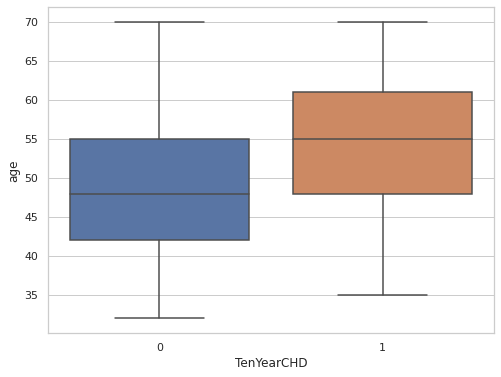

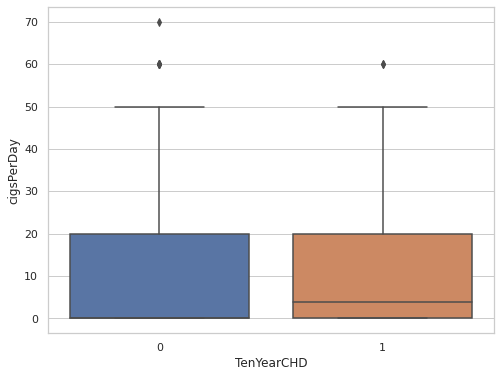

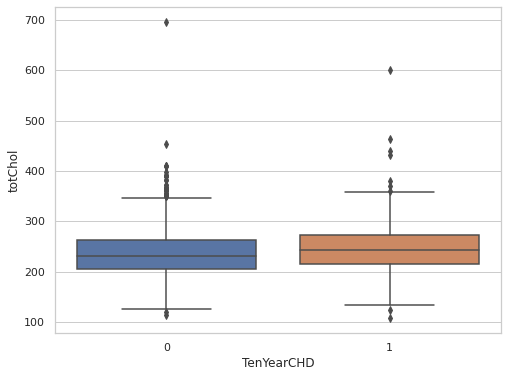

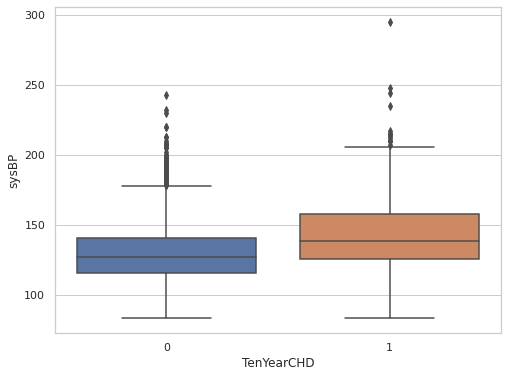

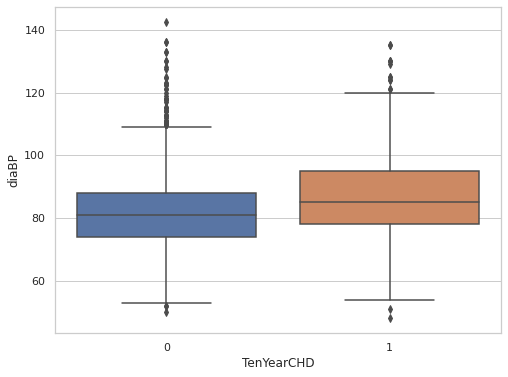

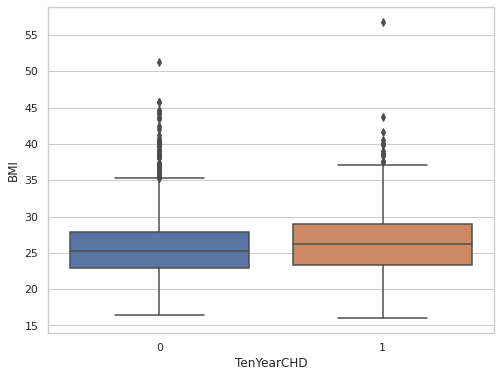

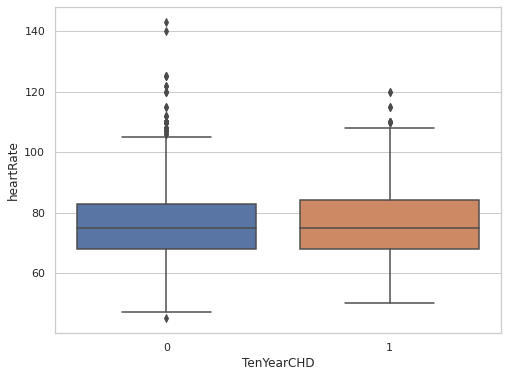

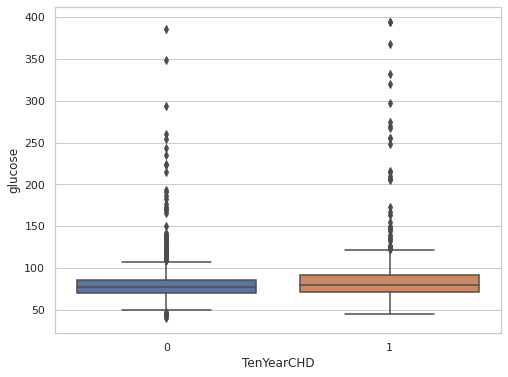

In [21]:
# plotting boxplot for continous features for each class of dependent feature.
for col in numeric_features:
  plt.figure(figsize = (8,6))
  sns.boxplot(x = dataset[dep_variable],y = dataset[col])

**Summary**:
* **The risk of CHD is higher for older patients than younger patients.**
* No conclusive evidence on the risk of CHD with other continuous variables

####**Analyzing the relationship between the dependent variable and the discrete variables in the data**

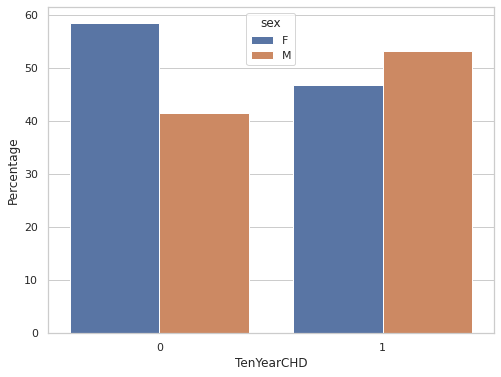

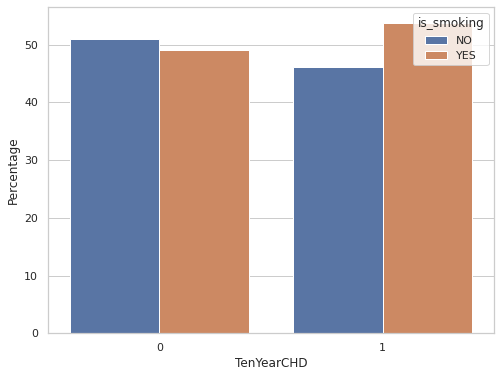

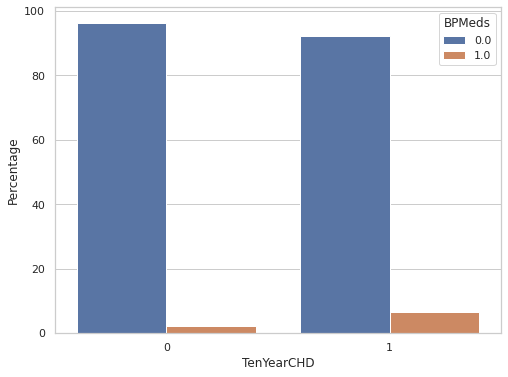

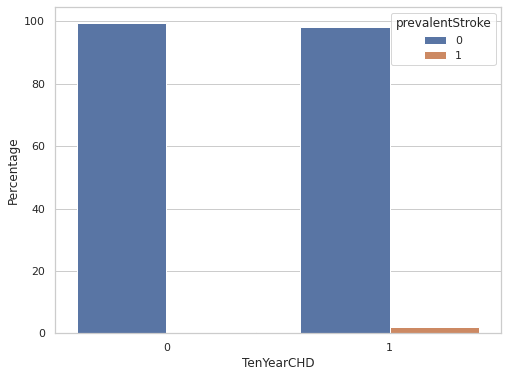

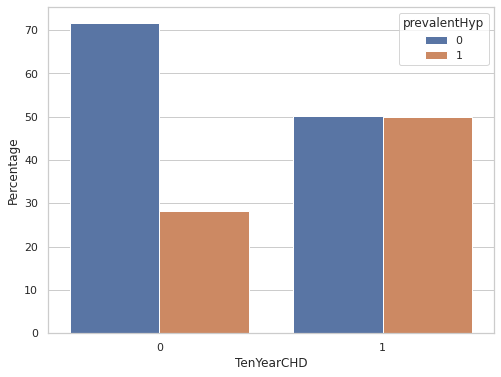

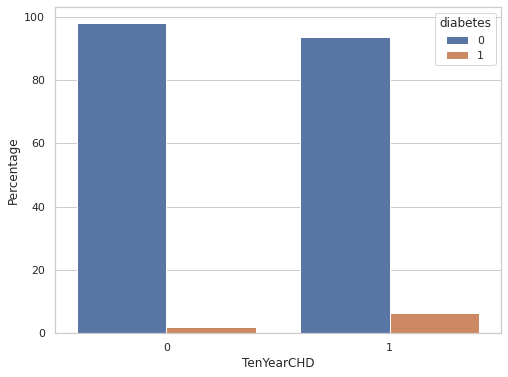

In [22]:
# Plotting values for different categorical variables WTR to dependent variable

df_groupby = dataset.groupby(by = dep_variable)   # Grouping data by dependent variable
for col in cat_features:
  df_plot = pd.DataFrame((df_groupby[col].value_counts()/df_groupby['age'].count())*100).reset_index().rename(columns = {0:'Percentage'})
  # creating dataframe for each categorical variable with relative percentage.
  plt.figure(figsize = (8,6))
  sns.barplot(x = df_plot[dep_variable], y = df_plot['Percentage'] , hue = df_plot[col])
  # plotting percentage wise barplot

**Summary:**
* **More percentage of men are at high risk for getting cardiovascular disease.**
* **Higher percentage of people who are smoking are at high risk.**
* **For people at high risk of cardiovascular disease there is 50% chance that they had prevalent hypertension.**



#### **Analyzing CHD risk for different desease conditions**.

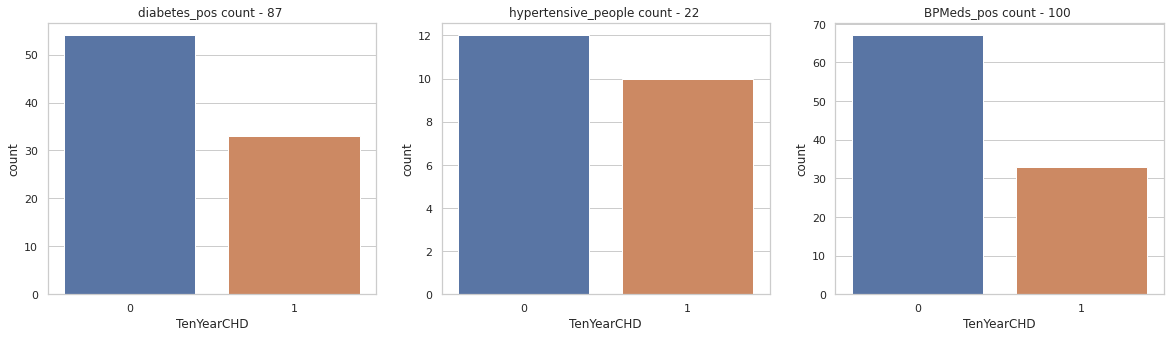

In [23]:
# Plotting for different disease conditions

diabetes_pos = dataset[dataset['diabetes'] == 1]                # creating dataset for diabetes positive people.
hypertensive_people = dataset[dataset['prevalentStroke'] == 1]  # creating dataset for hypertensive people.
BPMeds_pos = dataset[dataset['BPMeds'] == 1]                    # creatinf dataset for people taking BP medicines.

# plotting countplot
fig, ax = plt.subplots(1,3,figsize = (20,5))
i = 0
for data in ['diabetes_pos','hypertensive_people', 'BPMeds_pos']:
  sns.countplot(eval(data)[dep_variable],ax = ax[i])
  ax[i].set_title(f"{data} count - {eval(data).shape[0]} ")
  i += 1
plt.show()

In [24]:
diabetes_pos[dep_variable].value_counts()

0    54
1    33
Name: TenYearCHD, dtype: int64

In [25]:
hypertensive_people[dep_variable].value_counts()

0    12
1    10
Name: TenYearCHD, dtype: int64

In [26]:
BPMeds_pos[dep_variable].value_counts()

0    67
1    33
Name: TenYearCHD, dtype: int64

**Summary:**

* **37.93% of people with diabetes have CHD**
* **45.45% of people with Hypertension have CHD**
* **33.33% of people who take BP medication have CHD**

#### **Analyzing CHD risk for different age groups**

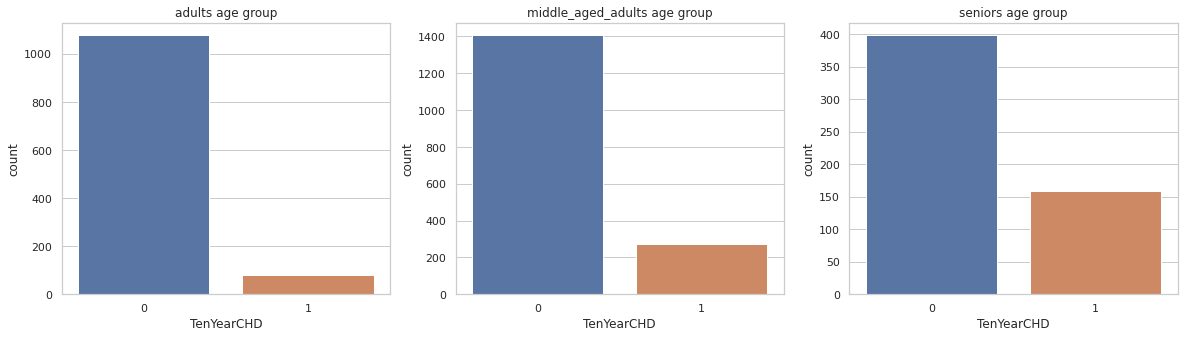

In [27]:
#Plotting by different age group

seniors = dataset[dataset['age'] >= 60]   # Creating dataframe of senior people
adults = dataset[dataset['age'] < 45]     # Creating dataframe of adult (relatively younger) people
middle_aged_adults = dataset[(dataset['age'] >= 45) & (dataset['age'] < 60)]      # Creating dataframe of middle ages adult people

# Plotting countplot of disease risk for each age group
fig, ax = plt.subplots(1,3,figsize = (20,5))
i = 0
for data in ['adults','middle_aged_adults','seniors']:
  sns.countplot(eval(data)[dep_variable],ax = ax[i])
  ax[i].set_title(f"{data} age group")
  i += 1
  
plt.show()

In [28]:
seniors[dep_variable].value_counts()

0    398
1    159
Name: TenYearCHD, dtype: int64

In [29]:
adults[dep_variable].value_counts()

0    1076
1      79
Name: TenYearCHD, dtype: int64

In [30]:
middle_aged_adults[dep_variable].value_counts()

0    1405
1     273
Name: TenYearCHD, dtype: int64

**Summary**

* **28.54% of Senior age people(> 59 years) have CHD**
* **16.27% of middle age people(>45 & <60 years) have CHD**
* **6.82% of Adults(<45 years) have CHD**
* **Senior age groups (> 59 years) are relatively at much higher risk for cardiovascular disease and adults (>= 32 but < 45 years) are relatively at lowest risk.**

###**Multivariate analysis**

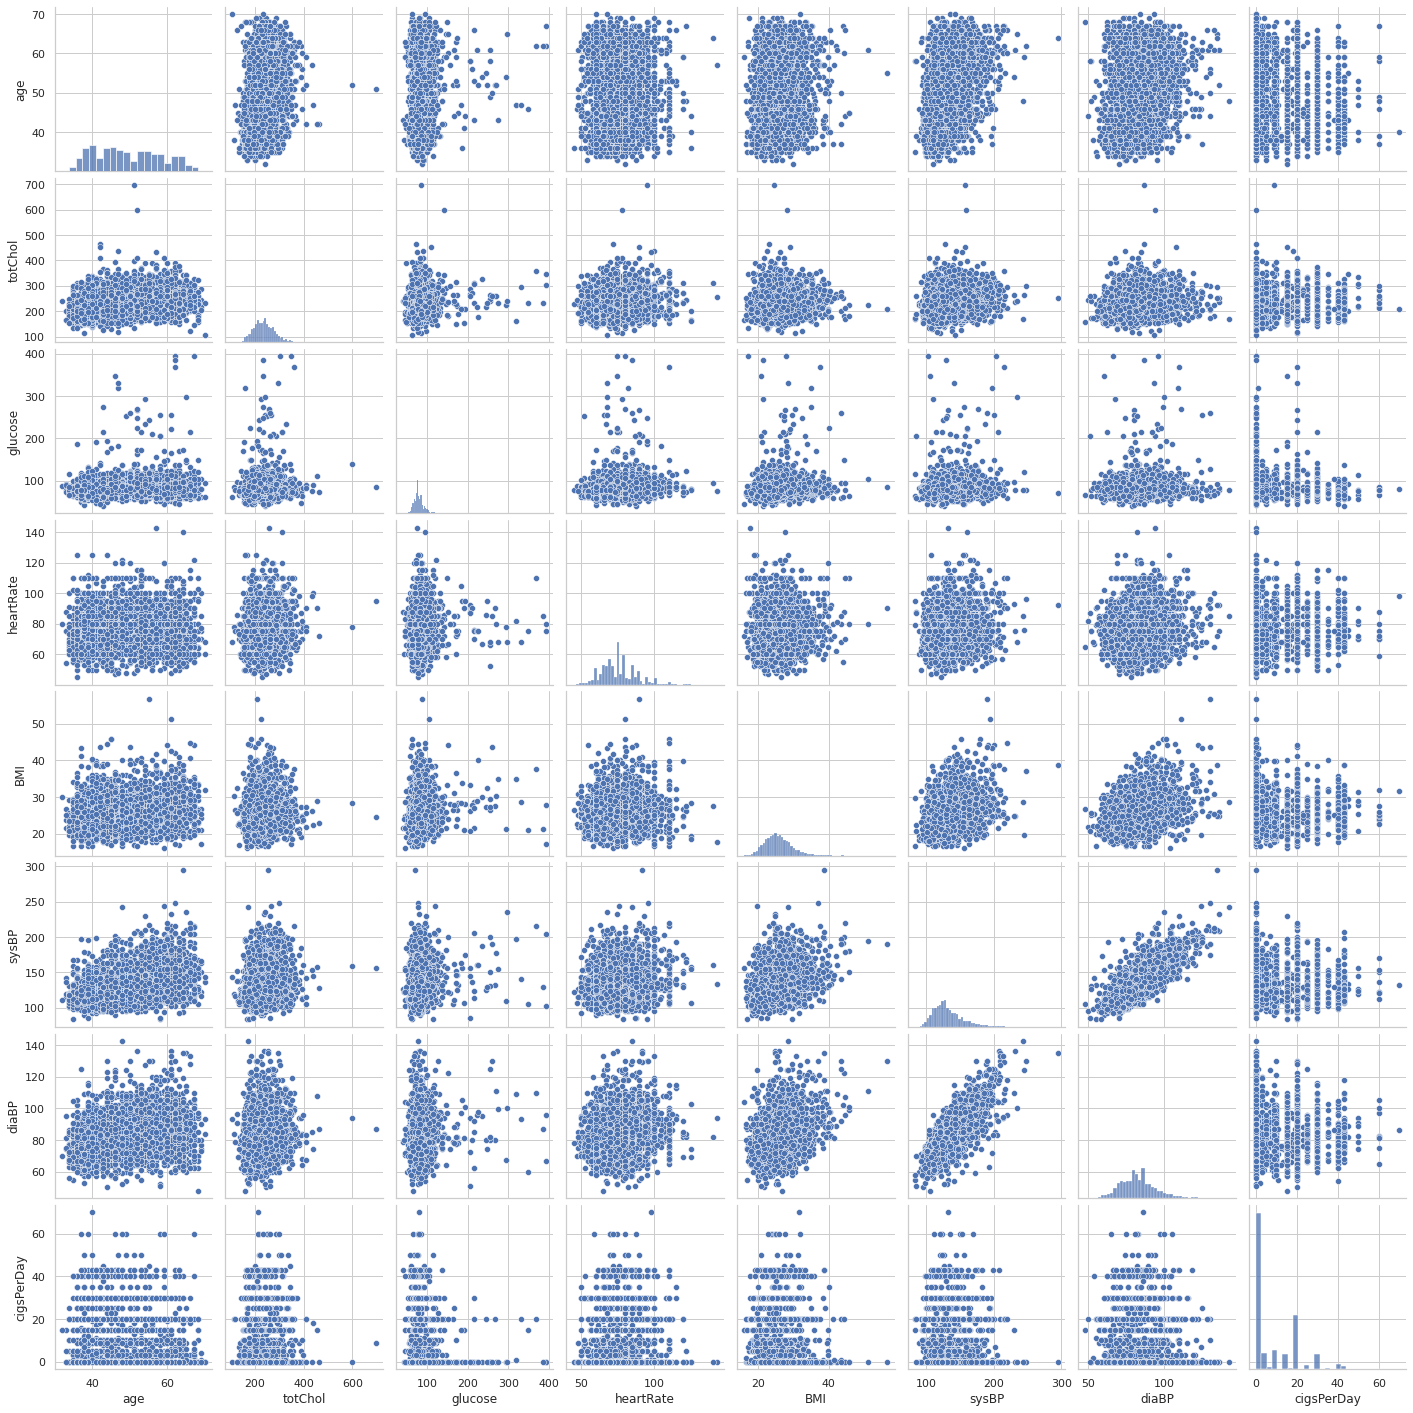

In [31]:
# Plotting pair plot for numerical variables 
num_features = list(set(numeric_features))   
num_df = df[num_features]
sns.pairplot(num_df)
plt.show()

###**Corelation Analysis**

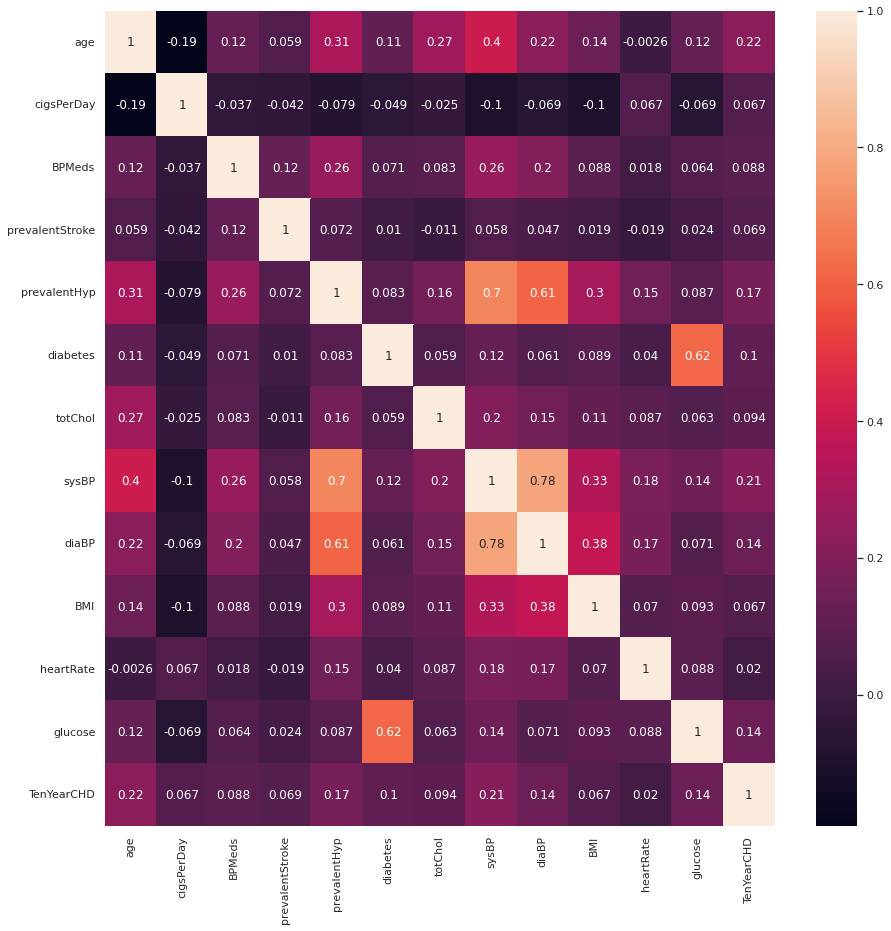

In [32]:
# Checking correlation of each numerical feature
plt.figure(figsize = (15,15))
df_corr = dataset.corr()
sns.heatmap(df_corr, annot = True)

**Summary**:
* **'sysBP' and 'diaBP' are highly correlated with 0.78 correlation.**
* **'glucose' and 'diabetes' are also slighly correlated with 0.62 correlation**
* **'sysBP' and 'prevalentHyp' are 0.7 correlated.**
* **'diaBP' and 'prevalentHyp' are also 0.61 correlated.**

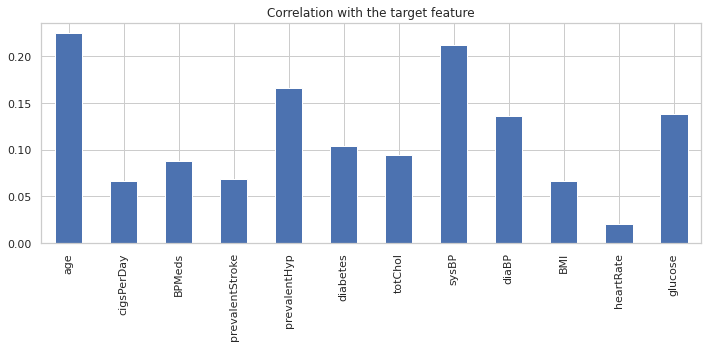

In [33]:
# plotting correaltion with dependent feature

dataset.drop(dep_variable, axis=1).corrwith(dataset[dep_variable]).plot(kind='bar', grid=True, figsize=(10, 5), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

**No feature is strongly correlated with the dependent variable.**

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

In [34]:
#Define dataframes to compare means between each outcome
#binary: “1”, means “Yes”, “0” means “No” CHD
No_CHD = dataset[dataset.TenYearCHD == 0]
has_CHD =dataset[dataset.TenYearCHD == 1]

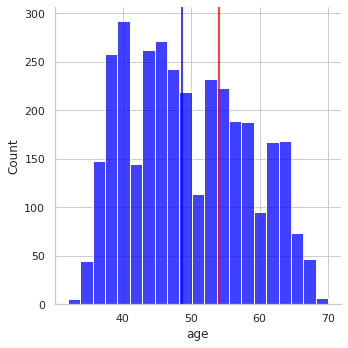

In [35]:
#plot to find mean of age in both having and not having CHD risk.
sns.displot(dataset.age,color='blue',kde = False)
plt.axvline(No_CHD.age.mean(),color='blue',label = 'no Risk')
plt.axvline(has_CHD.age.mean(),color='red',label = 'Risk')

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Increasing age donot have the same risk of developing heart disease.

Alternate Hypothesise : Increasing age have the  risk of developing heart disease.

#### 2. Perform an appropriate statistical test.

In [36]:
t1, p1 = stats.ttest_ind(No_CHD.age, has_CHD.age, equal_var=False)
print(f'ttest_ind:            t ={t1}  p = {p1}')
if p1 < 0.05 :
  print('Reject the null hypothesis.Increasing age have the risk of developing heart disease' )   
else:
   print('Fail to reject the null hypothesis.Increasing age donot have the same risk of developing heart disease')
       

ttest_ind:            t =-13.771446174098248  p = 1.8455541117753288e-38
Reject the null hypothesis.Increasing age have the risk of developing heart disease


In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

T-testing is used to compare the means between groups of continuous data

### Hypothetical Statement - 2

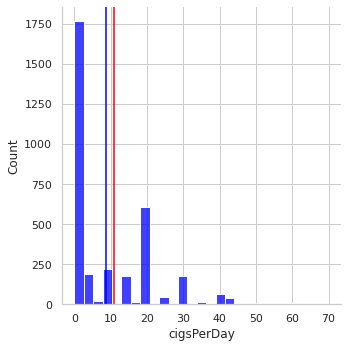

In [38]:
#plot to find mean of age in both having and not having CHD risk.
sns.displot(dataset.cigsPerDay,color='blue',kde = False)
plt.axvline(No_CHD.cigsPerDay.mean(),color='blue',label = 'no Risk')
plt.axvline(has_CHD.cigsPerDay.mean(),color='red',label = 'Risk')

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : CigsPerDay donot have the same risk of developing heart disease.

Alternate Hypothesise : CigsPerDay have the  risk of developing heart disease.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
t1, p1 = stats.ttest_ind(No_CHD.cigsPerDay, has_CHD.cigsPerDay, equal_var=False)

if p1 < 0.05 :
  print('Reject the null hypothesis.cigsPerDay have the risk of developing heart disease' )   
else:
   print('Fail to reject the null hypothesis.cigsPerDay donot have the same risk of developing heart disease')

Fail to reject the null hypothesis.cigsPerDay donot have the same risk of developing heart disease


##### Which statistical test have you done to obtain P-Value?

T-testing is used to compare the means between groups of continuous data

### Hypothetical Statement - 3

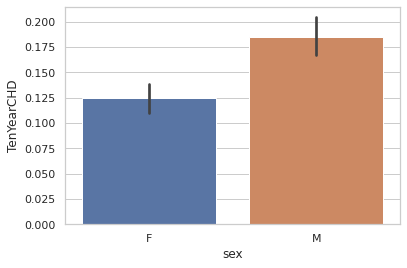

In [40]:
sns.barplot(data = dataset,x = 'sex' ,y ='TenYearCHD' )

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : There is no relatiionship between gender and CHD risk

Alternate Hypothesise : There is a relatiionship between gender and CHD risk.

#### 2. Perform an appropriate statistical test.

In [41]:
from scipy.stats import chi2_contingency

In [42]:
# Perform Statistical Test to obtain P-Value
s_chd_td = pd.crosstab(index = dataset.sex,columns = dataset.TenYearCHD)
chi2, pval , dof, expctd  = chi2_contingency(s_chd_td )
print(f'Chi-Squared Value: {chi2}')
print(f'P-value:    {pval} ')
if pval < 0.05 :
      print('Reject the null hypothesis,and thereis a relatiionship between gender and CHD risk' )
else:
      print('Fail to reject the null hypothesis,and there is no relatiionship between gender and CHD risk')
        

Chi-Squared Value: 23.814363915594157
P-value:    1.060878293561798e-06 
Reject the null hypothesis,and thereis a relatiionship between gender and CHD risk


##### Which statistical test have you done to obtain P-Value?

Chi-Squared testing is used  when testing statistical independence or associaton between categorical variables

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# Handling Missing Values & Missing Value Imputation
# Replacing null values with the median
for col in ['glucose','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
 dataset[col] = dataset[col].fillna(dataset[col].median())

In [44]:
# Now checking for missing values
dataset.isnull().any()

age                False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

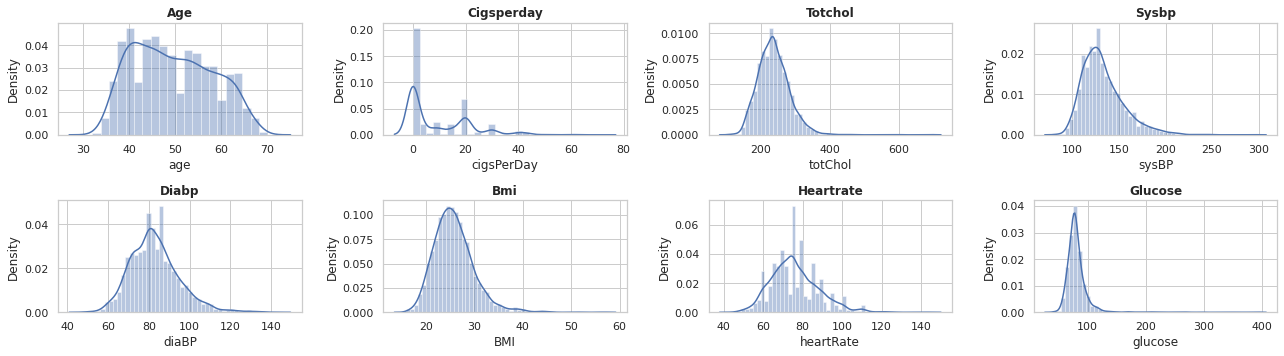

In [45]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

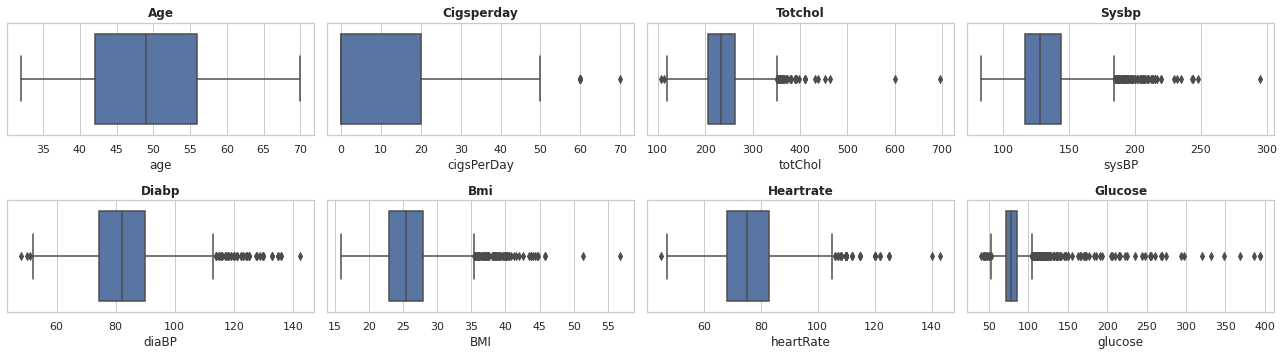

In [46]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [47]:
# Handling Outliers & Outlier treatments
# Removing outliers by standard methods and Plotting graphs:
df=dataset.copy()
for col in numeric_features:
  # Using IQR method to define the range of inliners:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,df[col]))
  


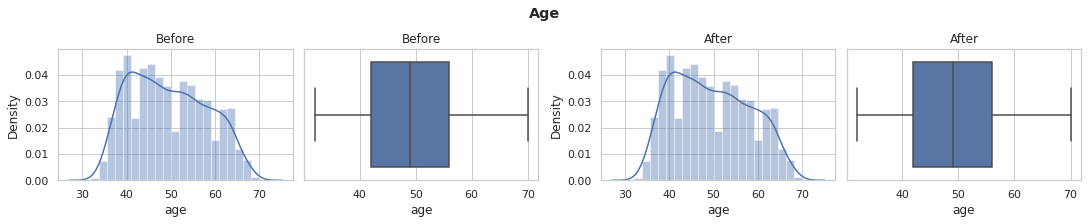

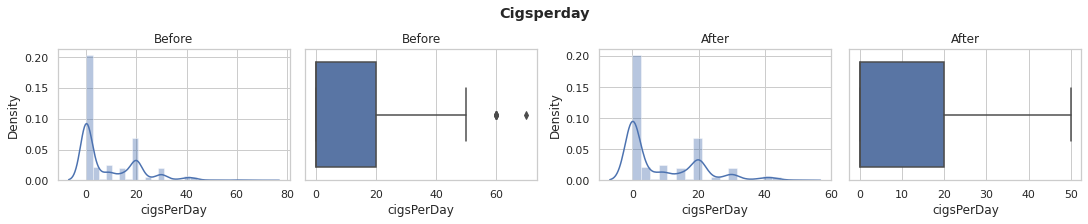

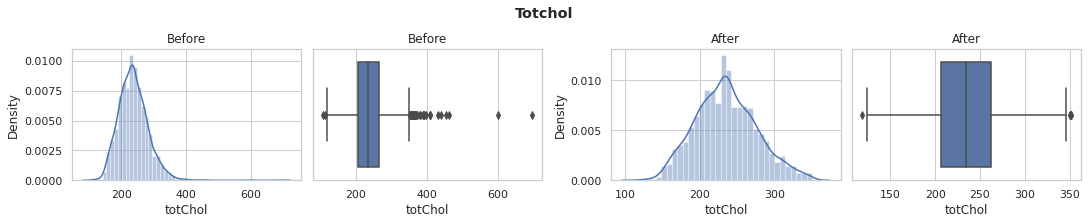

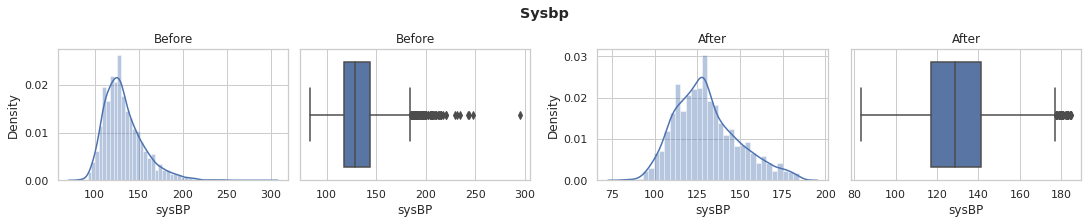

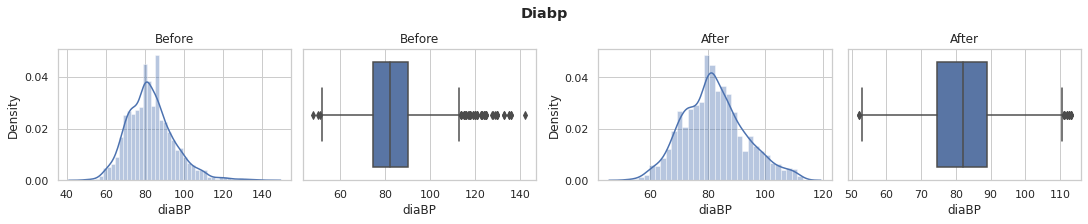

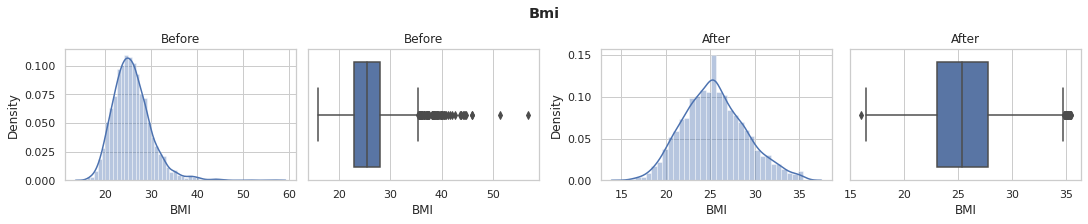

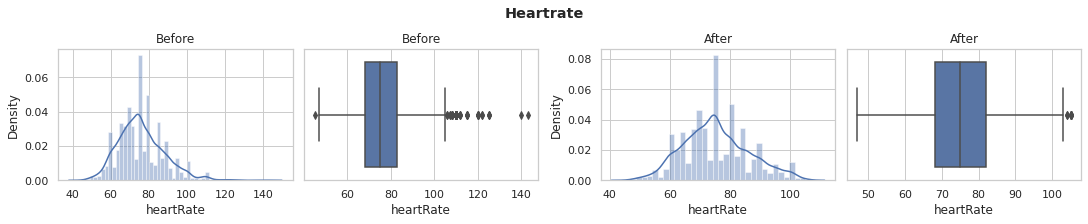

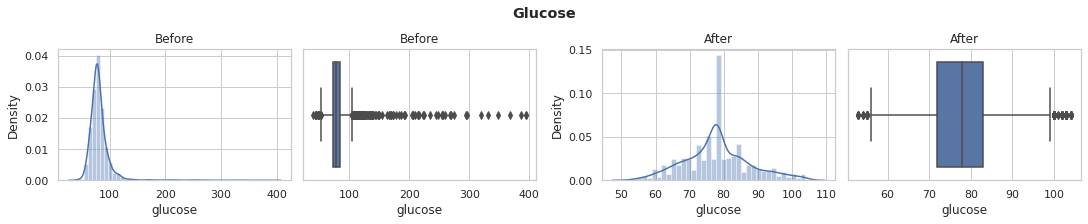

In [48]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(dataset[col], ax=ax[0]).set(title="Before")
  sns.boxplot(dataset[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df[col], ax=ax[2]).set(title="After")
  sns.boxplot(df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here. we have IQR method for dentifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3.
Then we Replaced Outliers with median value

Since the IQR is simply the range of the middle 50% of data values, it's not affected by extreme outliers.

### 3. Categorical Encoding

Before we go ahead, an important step to do is to convert our string feature into an integer.

We will name

* In sex feature M will be converted to 1 and F will be converted to 0.
* In is_smoking feature YES will be converted to 1 and NO will be converted to 0.

In [49]:
# Encode your categorical columns
# Applying function to convert string data to an integer
df['sex'] = df['sex'].apply(lambda x : 1 if x == "M" else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [50]:
# checking the distribution
df['sex'].value_counts()

0    1923
1    1467
Name: sex, dtype: int64

In [51]:
# checking the distribution
df['is_smoking'].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   float64
 1   sex              3390 non-null   int64  
 2   is_smoking       3390 non-null   int64  
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 397.4 KB


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here. we have simply converted sting to integer by using apply function and if,else statement

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
# Manipulate Features to minimize feature correlation and create new features
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### 2. Feature Selection

In [54]:
# Select your features wisely to avoid overfitting

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]

    return(vif)

In [56]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,42.49
1,sex,2.14
2,is_smoking,4.95
3,cigsPerDay,4.19
4,BPMeds,1.13
5,prevalentStroke,1.03
6,prevalentHyp,2.34
7,diabetes,1.05
8,totChol,37.37
9,sysBP,132.58


In [57]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD','id','totChol','diaBP','glucose','BMI','heartRate','sysBP']]])

,variables,VIF
0,age,3.01
1,sex,1.96
2,is_smoking,4.78
3,cigsPerDay,4.15
4,BPMeds,1.12
5,prevalentStroke,1.02
6,prevalentHyp,1.68
7,diabetes,1.04


In [58]:
Final_column = df[[i for i in df.describe().columns if i not in ['TenYearCHD','id','totChol','diaBP','glucose','BMI','heartRate','sysBP']]]

##### Which all features you found important and why?

In [59]:
Final_column

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,64.0,0,1,3.0,0.0,0,0,0
1,36.0,1,0,0.0,0.0,0,1,0
2,46.0,0,1,10.0,0.0,0,0,0
3,50.0,1,1,20.0,0.0,0,1,0
4,64.0,0,1,30.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...
3385,60.0,0,0,0.0,0.0,0,0,0
3386,46.0,0,0,0.0,0.0,0,0,0
3387,44.0,1,1,3.0,0.0,0,1,0
3388,60.0,1,0,0.0,0.0,0,1,0


##### What all feature selection methods have you used  and why?

used the VIF to select our feature ,to avoid model being biase.

### 9. Handling Imbalanced Dataset

Text(0.5, 1.0, 'TenYearCHD')

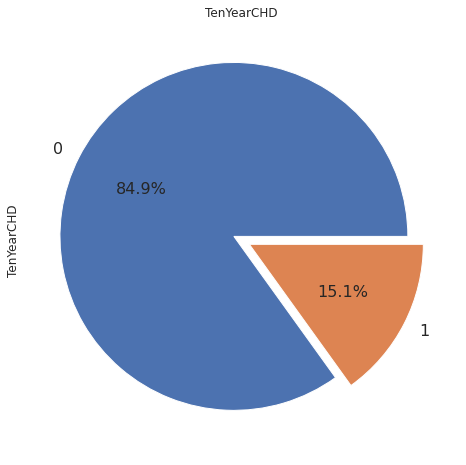

In [60]:
#check for data balance
df['TenYearCHD'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', figsize=(10,8),fontsize=16)
plt.title('TenYearCHD')

In [61]:

print("Before smote, counts of label '1': {}".format(sum(df['TenYearCHD'] == 1)))
print("Before smote, counts of label '0': {} \n".format(sum(df['TenYearCHD'] == 0)))

Before smote, counts of label '1': 511
Before smote, counts of label '0': 2879 



##### Do you think the dataset is imbalanced? Explain Why.

Yes,our data is highly imbalanced as 0 has 85% and 1 had only 15% 

In [62]:
# Handling Imbalanced Dataset
# pip install imblearn (if you don't have imblearn in your system)
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_sm, y_sm = sm.fit_resample(Final_column, df['TenYearCHD'])

In [64]:
print("After smote, counts of label '1': {}".format(sum( y_sm == 1)))
print("After smote, counts of label '0': {} \n".format(sum( y_sm == 0)))

After smote, counts of label '1': 2879
After smote, counts of label '0': 2879 



Text(0.5, 1.0, 'TenYearCHD')

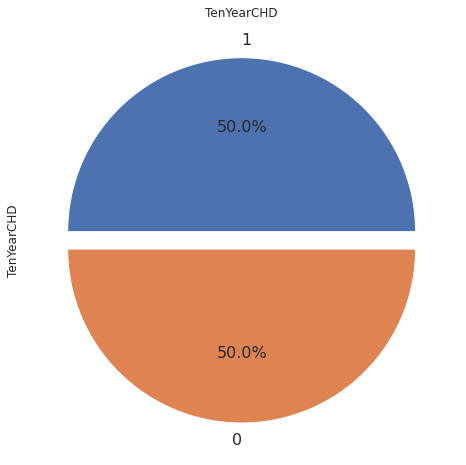

In [65]:
y_sm.value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', figsize=(10,8),fontsize=16)
plt.title('TenYearCHD')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced  dataset.

### 6. Data Scaling

In [66]:
# Scaling your data

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X_sm)

In [68]:
X


array([[ 1.45155418, -0.86273977,  0.97733222, ..., -0.06603574,
        -0.70370168, -0.14651047],
       [-1.77686172,  1.15909807, -1.02319353, ..., -0.06603574,
         1.42105672, -0.14651047],
       [-0.62385604, -0.86273977,  0.97733222, ..., -0.06603574,
        -0.70370168, -0.14651047],
       ...,
       [ 1.10565247,  1.15909807, -1.02319353, ..., -0.06603574,
        -0.70370168, -0.14651047],
       [ 0.58215574, -0.86273977,  0.97733222, ..., -0.06603574,
         1.42105672, -0.14651047],
       [ 1.33625361, -0.86273977,  0.97733222, ..., -0.06603574,
        -0.70370168, -0.14651047]])

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X,y_sm, test_size = 0.2, random_state = 11)



#**Model building**

##**Prerequisites**

In [70]:
scoring = make_scorer(f1_score, pos_label=1)
features = [i for i in Final_column.columns if i not in ['TenYearCHD']]
independent_variables = [i for i in Final_column.columns if i not in ['TenYearCHD']]


# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train_sm, X_test, y_train_sm, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train_sm,y_train_sm)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train_sm, y_train_sm, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

##**Logistic Regression**

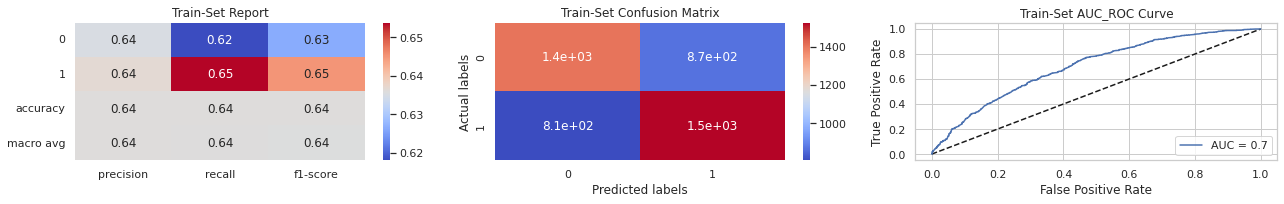

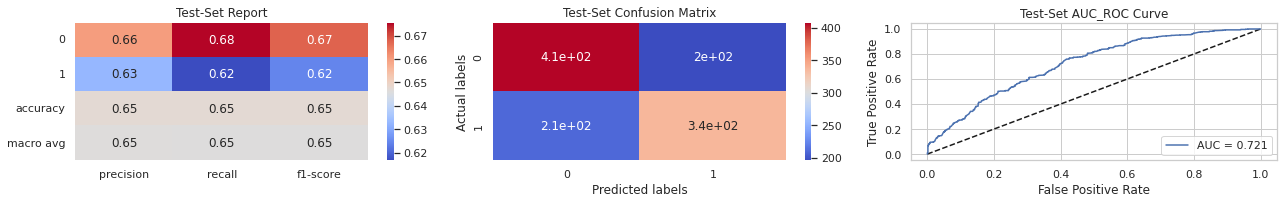

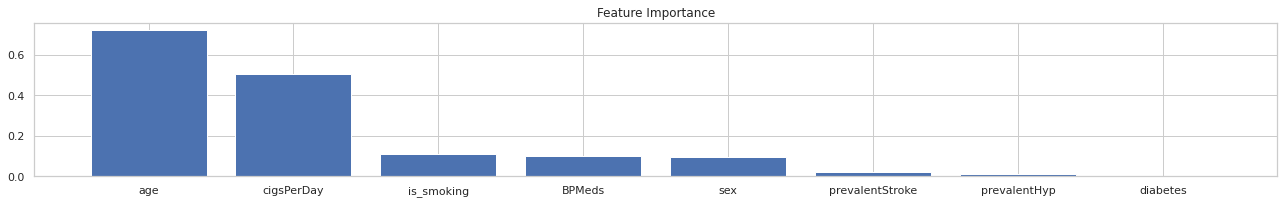

LogisticRegression(max_iter=10000)

In [71]:
# Fitting Logistic Regression Model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
analyse_model(lr, X_train_sm, X_test, y_train_sm, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train_sm, y_train_sm)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model


Best: 0.657541 using {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


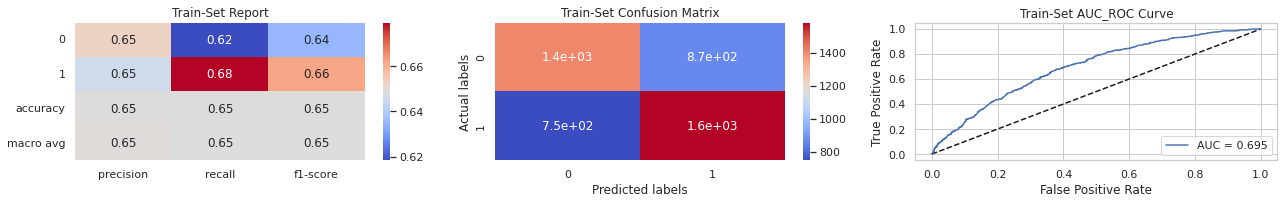

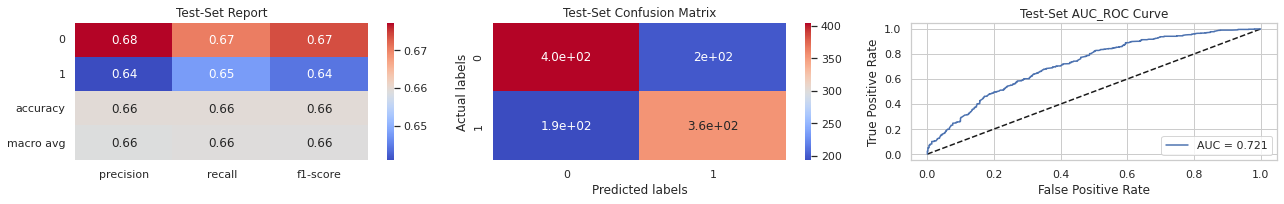

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(max_iter=10000),
             n_jobs=-1,
             param_grid={'C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['10', 'l2', '14', '16', '20', '18'],
                         'solver': ['lbfgs']},
             scoring='f1')

In [73]:
analyse_model(grid_search, X_train_sm, X_test, y_train_sm, y_test)

##**Naive Bayes Classifier**

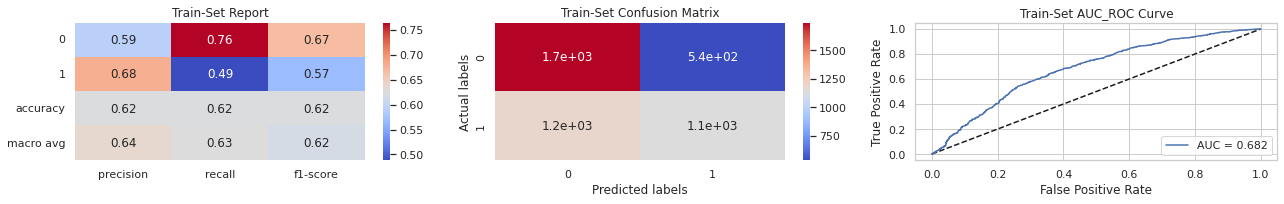

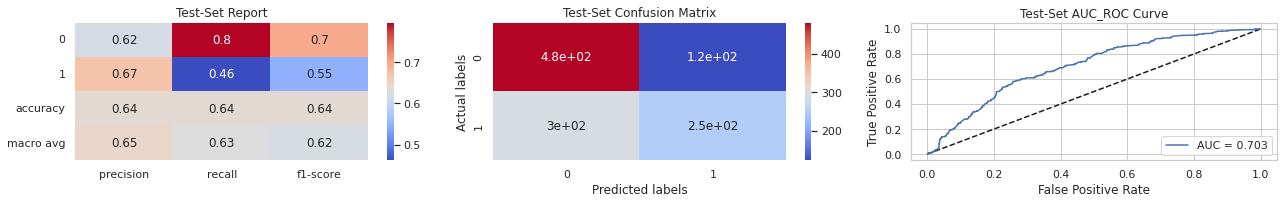

<Figure size 1296x216 with 0 Axes>

GaussianNB()

In [74]:
# Fitting Naive Bayes Classifier
nbc = GaussianNB()
analyse_model(nbc, X_train_sm, X_test, y_train_sm, y_test)

##**Support Vector Classifier**

In [75]:
# ML Model - 3 Implementation
svm = SVC(probability = True)
# Fit the Algorithm
svm.fit(X_train_sm,y_train_sm)

SVC(probability=True)

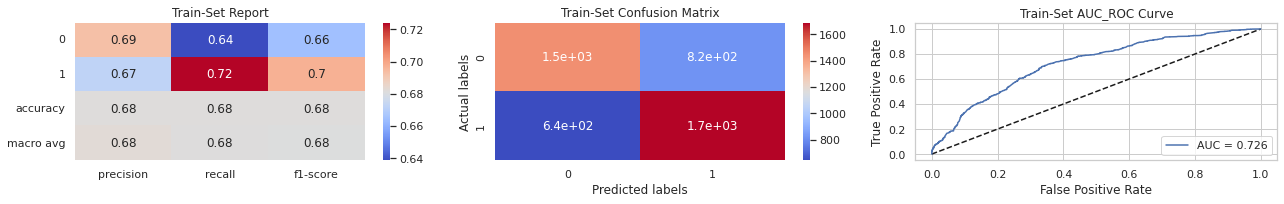

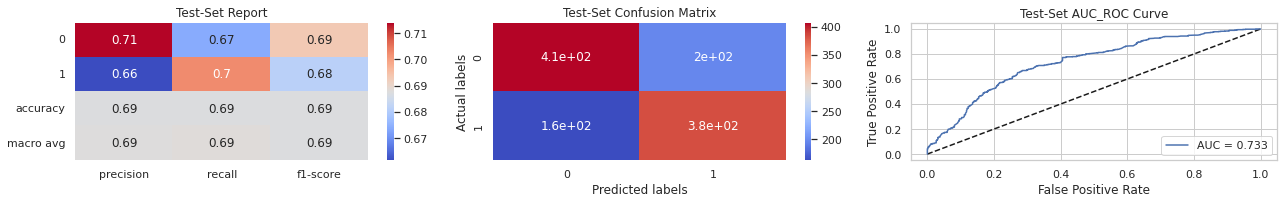

<Figure size 1296x216 with 0 Axes>

SVC(probability=True)

In [76]:
# Analysing the model with best set of parametes
analyse_model(svm, X_train_sm, X_test, y_train_sm, y_test)

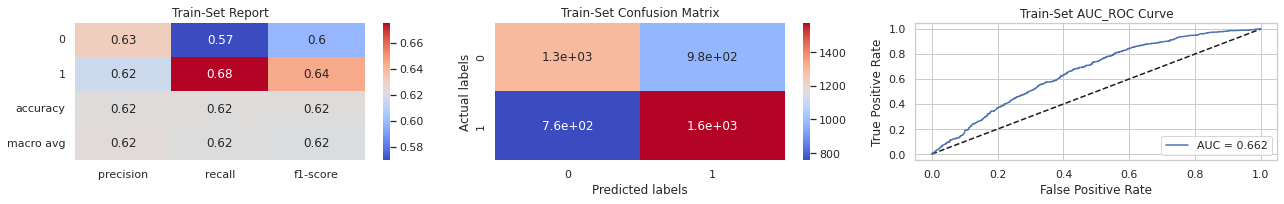

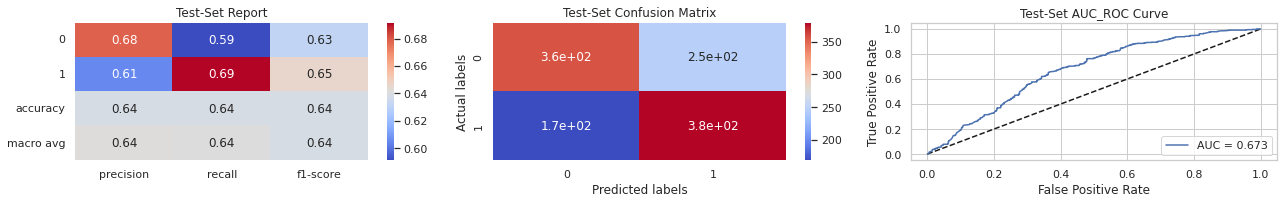

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [1000]},
             scoring=make_scorer(f1_score, pos_label=1))

In [77]:
# SVM algorithm
svm = SVC(random_state= 0,probability=True)

# HYperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"],
        'C': [0.1, 1, 10, 100],
        'max_iter' : [1000]}

# GridSearch to find the best parameters
svc = GridSearchCV(svm, param_grid = grid, scoring = scoring, cv=5)
svc.fit(X_train_sm, y_train_sm)

# Analysing the model with best set of parametes
analyse_model(svc, X_train_sm, X_test, y_train_sm, y_test)

##**Random Forest Classifier**

In [78]:
# ML Model - 2 Implementation
rfc = RandomForestClassifier(random_state=2)
# Fit the Algorithm
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=2)

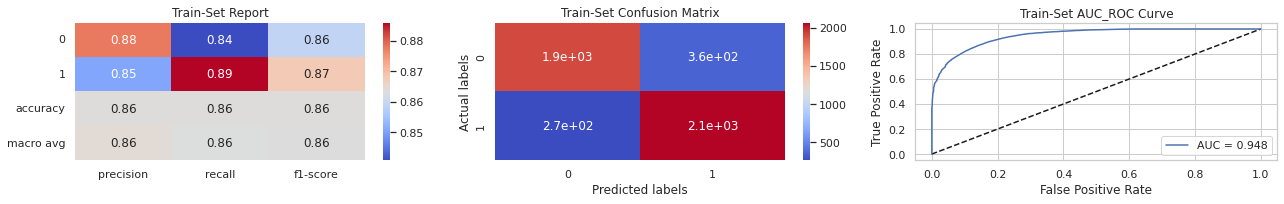

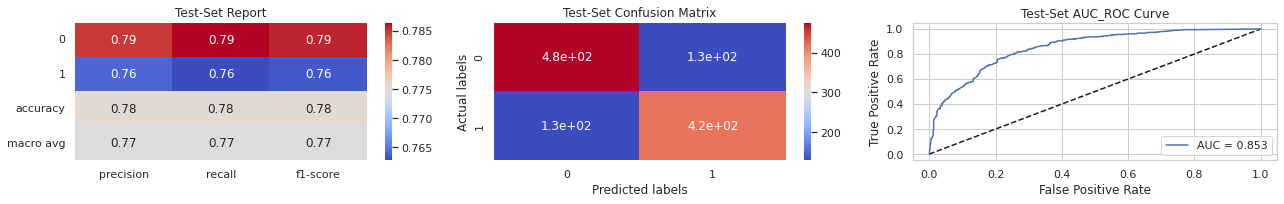

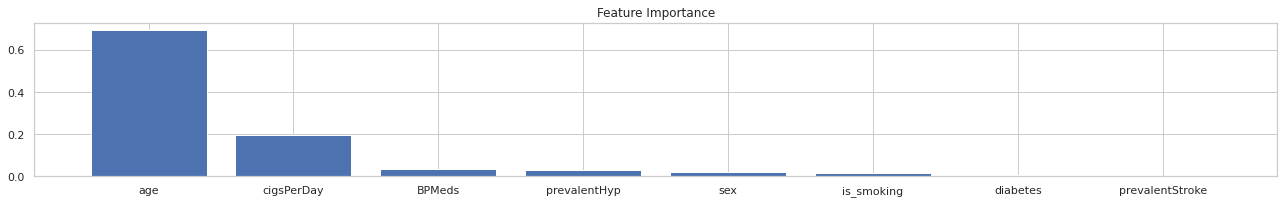

RandomForestClassifier(random_state=2)

In [79]:
# Analysing the model with best set of parametes
analyse_model(rfc, X_train_sm, X_test, y_train_sm, y_test)

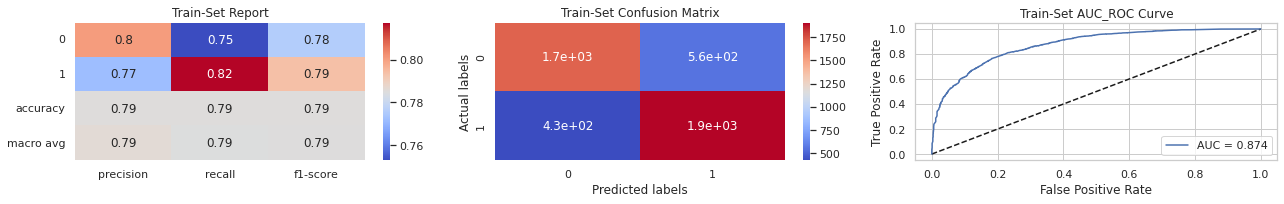

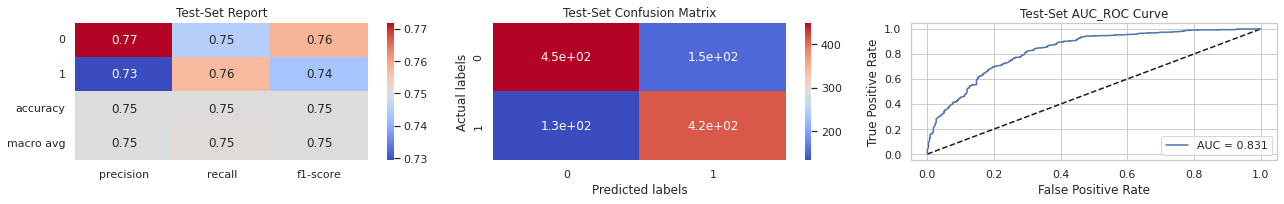

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [30, 40, 50],
                         'n_estimators': [100, 150, 200]},
             scoring=make_scorer(f1_score, pos_label=1))

In [80]:
# Classifier
rfc = RandomForestClassifier(random_state=2)


grid = {'n_estimators' : [100,150,200],
        'max_depth' : [15,20,25],
        'min_samples_split' : [30,40,50],
        'min_samples_leaf' : [2,5,10]}        

# GridSearch to find the best parameters
rf = GridSearchCV(rfc, param_grid = grid, scoring = scoring, cv=5)
rf.fit(X_train_sm, y_train_sm)

# Analysing the model with best set of parametes
analyse_model(rf, X_train_sm, X_test, y_train_sm, y_test)

##**XGBoost Classifier**

In [81]:
# ML Model - 4 Implementation
xgb = XGBClassifier()
# Fit the Algorithm
xgb.fit(X_train_sm, y_train_sm)

XGBClassifier()

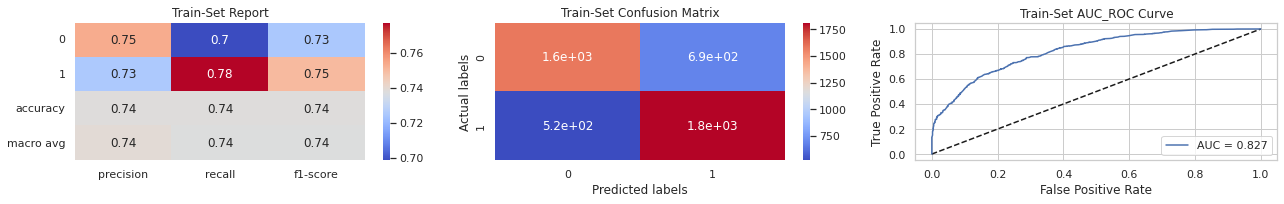

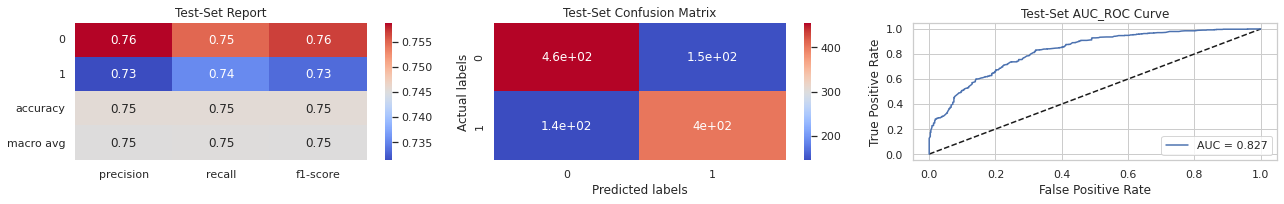

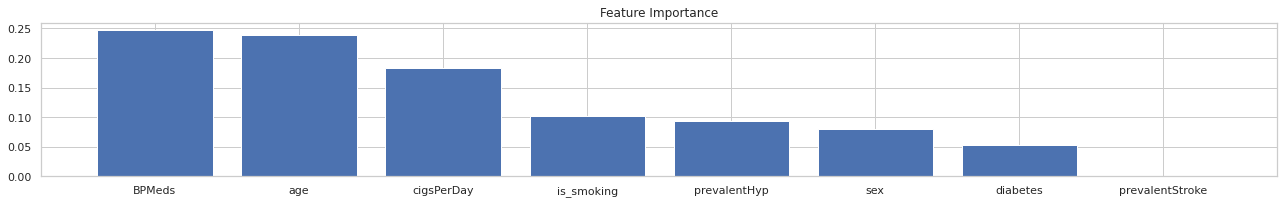

XGBClassifier()

In [82]:
# Analysing the model with best set of parametes
analyse_model(xgb, X_train_sm, X_test, y_train_sm, y_test)

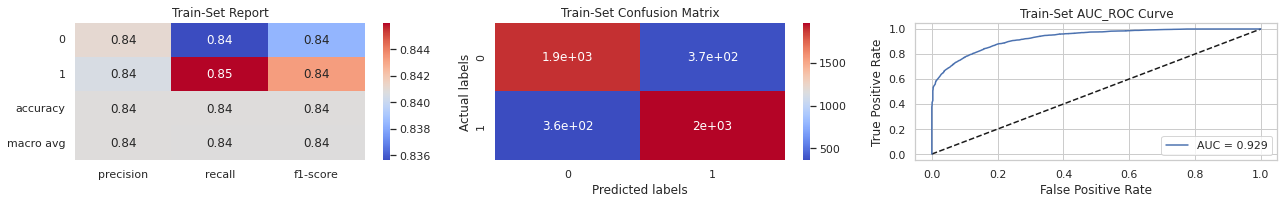

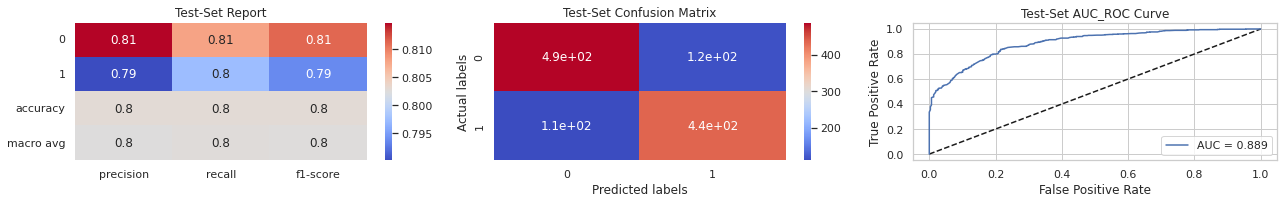

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=3, silent=True),
             param_grid={'eta': [0.05, 0.08, 0.1], 'max_depth': [8, 10],
                         'min_samples_leaf': [30, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [150]},
             scoring=make_scorer(f1_score, pos_label=1))

In [83]:
# Classifier
xgb = XGBClassifier(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
clf_xgb = GridSearchCV(xgb, param_grid = grid, scoring = scoring, cv=5)
clf_xgb.fit(X_train_sm, y_train_sm)

# Analysing the model with best set of parametes
analyse_model(clf_xgb, X_train_sm, X_test, y_train_sm, y_test)

##**KNN Classifier**

In [84]:
# ML Model - 2 Implementation
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the Algorithm
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=2)

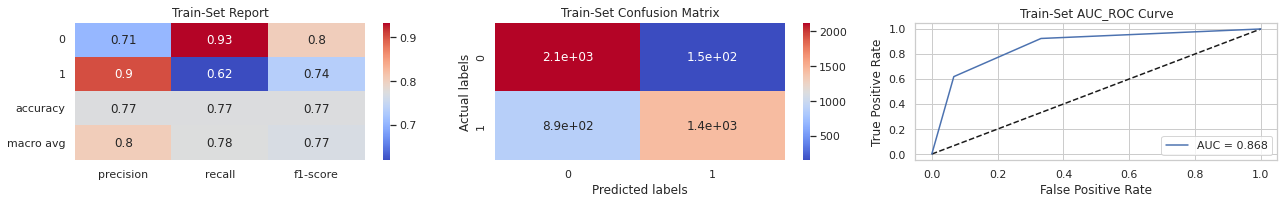

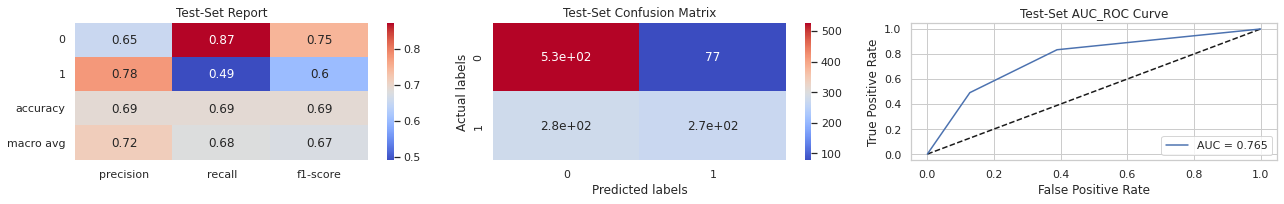

<Figure size 1296x216 with 0 Axes>

KNeighborsClassifier(n_neighbors=2)

In [85]:
# Analysing the model with best set of parametes
analyse_model(knn, X_train_sm, X_test, y_train_sm, y_test)

In [ ]:
# Classifier
knn = KNeighborsClassifier()

# HYperparameter Grid
#grid = {'n_neighbors' : [5,7,9],
        #'metric' : ['minkowski','euclidean','manhattan']}

grid= {'n_neighbors':np.arange(1,150),'metric' : ['minkowski','euclidean','manhattan']}     

# GridSearch to find the best parameters
knn_cv = GridSearchCV(knn, param_grid = grid, scoring = scoring, cv=5)
knn_cv.fit(X_train_sm, y_train_sm)

# Analysing the model with best set of parametes
analyse_model(knn_cv, X_train_sm, X_test, y_train_sm, y_test)

##**Conclusion**

1. If we want to completely avoid any situations where the patient has heart disease, a high recall is desired. Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.
2. Assuming that in our case the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, so we want a balance between precision and recall and a high f1 score is desired.
3. Since we have added synthetic datapoints to handle the huge class imbalance in training set, the data distribution in train and test are different so the high performance of models in the train set is due to the train-test data distribution mismatch and not due to overfitting.
4. Best performance of Models on test data based on evaluation metrics for class 1:
  1. Recall - xgboost with hyperparameter
  2. Precision - xgboost with hyperparameter
  3. F1 Score - xgboost with hyperparameter
  4. Accuracy - xgboost with hyperparameter
